In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

### DATASET 2020

In [9]:
df_2020 = pd.read_csv('../../dobrano_2015_pre_preprocessado.csv', sep=';', low_memory=False, encoding='latin1')
df_2020.shape

(500000, 23)

In [10]:
df_2020.head(5)

,IDADE,SEXO,RACACOR,ESC2010,OCUP,LOCOCOR,CODMUNOCOR,ASSISTMED,CAUSABAS,CIRCOBITO,FONTE,DIA_NASC,MES_NASC,ANO_NASC,DIA_OBITO,MES_OBITO,ANO_OBITO,ANOS_IDADE,ESTADO,GRUPO_CAUSA_BASICA,CAUSA_BASICA,OCUPACAO,GRUPO_OCUPACAO
0,66.0,F,PARDA,NaN,999993.0,HOSPITAL,120020,SIM,R99,NaN,NaN,5,7.0,1949.0,21,11,2015,66.0,AC,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as não especific...,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
1,82.0,M,PRETA,I,999993.0,DOMICILIO,120050,NaN,E149,NaN,NaN,15,2.0,1932.0,2,2,2015,82.0,AC,NaN,Diabetes mellitus não especificado - sem compl...,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
2,69.0,F,BRANCA,EF_II,999993.0,DOMICILIO,120050,NaN,J439,NaN,NaN,30,3.0,1945.0,8,2,2015,69.0,AC,Doenças crônicas das vias aéreas inferiores,Enfisema não especificado,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
3,51.0,M,PARDA,EF_II,612005.0,DOMICILIO,120050,I,K259,NaN,NaN,22,8.0,1963.0,9,2,2015,51.0,AC,"Doenças do esôfago, do estômago e do duodeno",Úlcera gástrica - não especificada como aguda ...,Produtor agrícola polivalente,"TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P..."
4,0.0,M,PARDA,NaN,NaN,DOMICILIO,120050,NaN,R99,NaN,NaN,0,NaN,NaN,25,1,2015,0.0,AC,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as não especific...,NaN,NaN


In [11]:
df_2020.isnull().sum()

IDADE                    126
SEXO                       0
RACACOR                35322
ESC2010                78483
OCUP                  131460
LOCOCOR                    0
CODMUNOCOR                 0
ASSISTMED             147043
CAUSABAS                   0
CIRCOBITO             427681
FONTE                 441792
DIA_NASC                   0
MES_NASC                1779
ANO_NASC                1779
DIA_OBITO                  0
MES_OBITO                  0
ANO_OBITO                  0
ANOS_IDADE               126
ESTADO                     0
GRUPO_CAUSA_BASICA    105368
CAUSA_BASICA               0
OCUPACAO              328689
GRUPO_OCUPACAO        131460
dtype: int64

In [8]:
df_2020.dropna()

,IDADE,SEXO,RACACOR,ESC2010,LOCOCOR,CODMUNOCOR,ASSISTMED,CIRCOBITO,FONTE,DIA_NASC,MES_NASC,ANO_NASC,DIA_OBITO,MES_OBITO,ANO_OBITO,ANOS_IDADE,ESTADO,GRUPO_CAUSA_BASICA,CAUSA_BASICA,OCUPACAO,GRUPO_OCUPACAO
111,47.0,M,BRANCA,EM,OUTROS,353460,SIM,ACIDENTE,BO,19,9.0,1972.0,25,6,2020,47.0,SP,Acidentes de transporte,Pessoa traumatizada em um acidente com um veíc...,Motorista de caminhão (rotas regionais e inter...,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...
189,47.0,M,PARDA,EF_II,DOMICILIO,211220,NAO,SUICIDIO,BO,15,7.0,1972.0,13,2,2020,47.0,MA,Lesões autoprovocadas intencionalmente,Lesão autoprovocada intencionalmente por enfor...,Motorista de táxi,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...
249,31.0,M,PARDA,EF_I,OUTROS,280430,NAO,SUICIDIO,BO,12,10.0,1988.0,7,4,2020,31.0,SE,Lesões autoprovocadas intencionalmente,"Auto-intoxicação por e exposição, intencional,...",Trabalhador volante da agricultura,"TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P..."
266,24.0,M,PARDA,EF_II,DOMICILIO,280360,NAO,SUICIDIO,BO,29,7.0,1995.0,17,4,2020,24.0,SE,Lesões autoprovocadas intencionalmente,Lesão autoprovocada intencionalmente por enfor...,Operador de máquinas de construção civil e min...,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...
322,64.0,M,BRANCA,EF_I,VIAP,412160,NAO,ACIDENTE,BO,17,1.0,1956.0,27,5,2020,64.0,PR,Ocupante de um automóvel traumatizado em um ac...,Ocupante de um automóvel [carro] traumatizado ...,Caseiro (agricultura),"TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499651,75.0,M,BRANCA,SEM,OES,410580,SIM,I,OUTRA,16,11.0,1944.0,6,2,2020,75.0,PR,Outros riscos acidentais à respiração,Inalação do conteúdo gástrico - residência,Pedreiro,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...
499787,80.0,F,BRANCA,EF_I,HOSPITAL,355030,SIM,ACIDENTE,BO,18,7.0,1939.0,23,1,2020,80.0,SP,Quedas,Outras quedas no mesmo nível - local não espec...,Empregado doméstico nos serviços gerais,"TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉ..."
499835,73.0,M,BRANCA,SUPERIOR_C,HOSPITAL,261160,SIM,ACIDENTE,I,19,7.0,1946.0,30,1,2020,73.0,PE,Outras causas externas de traumatismos acidentais,Queda sem especificação - residência,Economista,PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES ...
499853,60.0,M,PARDA,EF_II,OES,260790,I,I,BO,7,8.0,1959.0,29,1,2020,60.0,PE,Eventos (fatos) cuja intenção é indeterminada,"Contato com objeto contundente, intenção não d...",Marceneiro,TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...


In [12]:
causas = df_2020.CAUSA_BASICA.value_counts()
causas

Infarto agudo do miocárdio não especificado                                                                                                                            30948
Pneumonia não especificada                                                                                                                                             20548
Acidente vascular cerebral, não especificado como hemorrágico ou isquêmico                                                                                             19522
Outras causas mal definidas e as não especificadas de mortalidade                                                                                                      17854
Agressão por meio de disparo de outra arma de fogo ou de arma não especificada - rua e estrada                                                                         11775
                                                                                                                                       

In [13]:
causas = causas[:10]

In [14]:
causas

Infarto agudo do miocárdio não especificado                                                       30948
Pneumonia não especificada                                                                        20548
Acidente vascular cerebral, não especificado como hemorrágico ou isquêmico                        19522
Outras causas mal definidas e as não especificadas de mortalidade                                 17854
Agressão por meio de disparo de outra arma de fogo ou de arma não especificada - rua e estrada    11775
Diabetes mellitus não especificado - sem complicações                                             11395
Morte sem assistência                                                                             11087
Hipertensão essencial (primária)                                                                  10999
Neoplasia maligna dos brônquios ou pulmões, não especificado                                       7980
Septicemia não especificada                                     

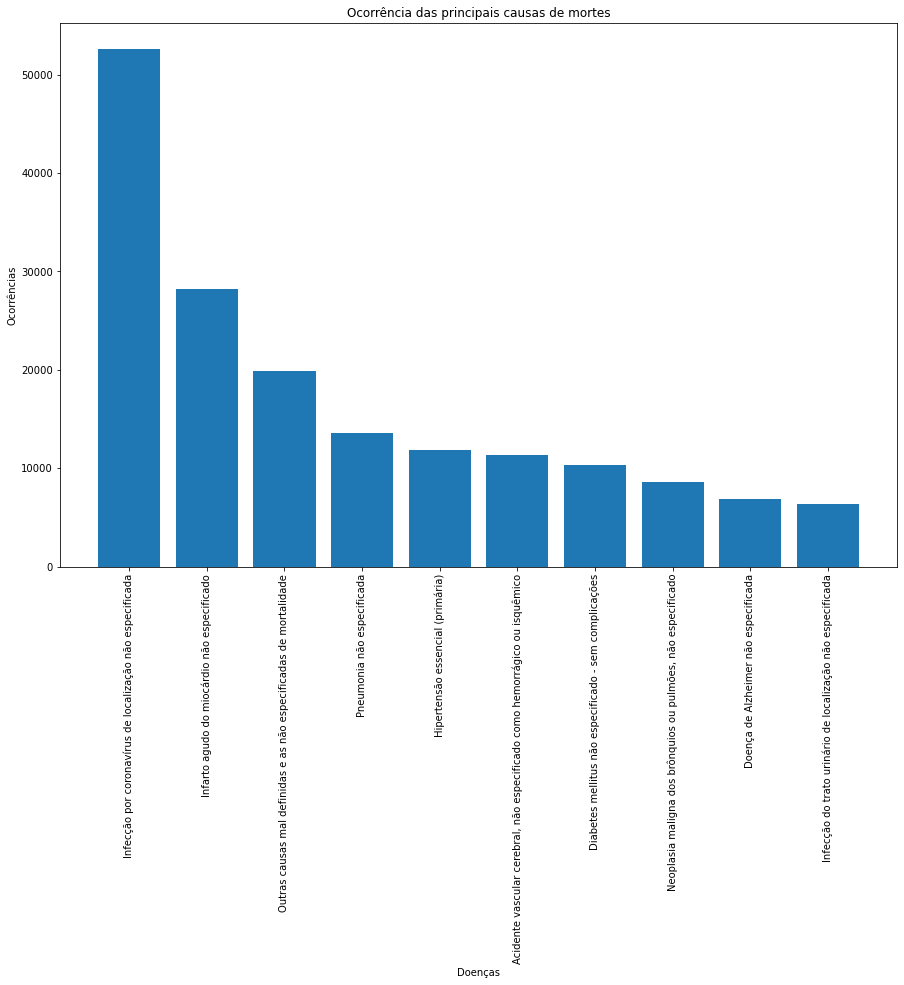

In [11]:
fig = plt.figure(figsize=(15,10))
plt.bar(causas.index, causas.values)
plt.xticks(rotation='vertical')
plt.xlabel('Doenças')
plt.ylabel('Ocorrências')
plt.title('Ocorrência das principais causas de mortes')
plt.show()

In [13]:
causas.to_json(path_or_buf="../../principais_doencas.json", index=True, indent=4, force_ascii=False)

#### Voltando aos dados numéricos

In [16]:
df_2020['RACACOR'] = df_2020['RACACOR'].replace(['BRANCA', 'PRETA', 'AMARELA', 'PARDA', 'INDIGENA'], [1, 2, 3, 4, 5])

In [15]:
df_2020['SEXO'] = df_2020['SEXO'].replace(['M', 'F', 'I'], [1, 2, 0])

In [6]:
df_2020['ESC2010'] = df_2020['ESC2010'].replace(['SEM', 'EF_I', 'EF_II', 'EM', 'SUPERIOR_I', 'SUPERIOR_C', 'I'],
                                                [0, 1, 2, 3, 4, 5, 9]
                                         )

In [8]:
df_2020['FONTE'] = df_2020['FONTE'].replace(['BO', 'HOSPITAL', 'FAMILIA', 'OUTRA', 'I'],
                                            [1, 2, 3, 4, 9]
                                     )

In [10]:
df_2020['LOCOCOR'] = df_2020['LOCOCOR'].replace(['HOSPITAL', 'OES', 'DOMICILIO', 'VIAP', 'OUTROS', 'I'],
                                      [1, 2, 3, 4, 5, 9]
                                         )

In [11]:
df_2020['ASSISTMED'] = df_2020['ASSISTMED'].replace(['SIM', 'NAO', 'I'],
                                                    [1, 2, 9]
                                             )

In [12]:
df_2020['CIRCOBITO'] = df_2020['CIRCOBITO'].replace(['ACIDENTE', 'SUICIDIO', 'HOMICIDIO', 'OUTROS', 'I'], [1, 2, 3, 4, 9])

In [17]:
df_2020.head()

,IDADE,SEXO,RACACOR,ESC2010,LOCOCOR,CODMUNOCOR,ASSISTMED,CIRCOBITO,FONTE,DIA_NASC,MES_NASC,ANO_NASC,DIA_OBITO,MES_OBITO,ANO_OBITO,ANOS_IDADE,ESTADO,GRUPO_CAUSA_BASICA,CAUSA_BASICA,OCUPACAO,GRUPO_OCUPACAO
0,68.0,1,1.0,1.0,3,316930,2.0,NaN,NaN,10,5.0,1951.0,25,1,2020,68.0,MG,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as não especific...,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
1,53.0,1,2.0,1.0,3,316930,2.0,NaN,NaN,16,3.0,1966.0,25,1,2020,53.0,MG,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as não especific...,Trabalhador agropecuário em geral,"TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P..."
2,82.0,2,1.0,1.0,1,316930,NaN,NaN,NaN,10,7.0,1937.0,14,1,2020,82.0,MG,Outras doenças dos intestinos,"Doença diverticular do intestino, de localizaç...",NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
3,73.0,2,1.0,1.0,1,316930,1.0,NaN,NaN,2,11.0,1946.0,20,1,2020,73.0,MG,Outras doenças do aparelho respiratório,Insuficiência respiratória aguda,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
4,60.0,1,1.0,5.0,1,316930,1.0,NaN,NaN,12,9.0,1959.0,26,1,2020,60.0,MG,Outras doenças bacterianas,Septicemia não especificada,Professor da educação de jovens e adultos do ...,PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES ...


#### Clusterização

In [78]:
df2 = df_2020.loc[df_2020['ANOS_IDADE'].notnull()]

In [79]:
df2 = df2.loc[df2['ANO_NASC'].notnull()]

In [80]:
df_analises = df2[['ANOS_IDADE', 'ANO_NASC']] #escolhe 2 colunas

In [81]:
df_analises

,ANOS_IDADE,ANO_NASC
0,68.0,1951.0
1,53.0,1966.0
2,82.0,1937.0
3,73.0,1946.0
4,60.0,1959.0
...,...,...
499995,63.0,1956.0
499996,92.0,1927.0
499997,85.0,1935.0
499998,82.0,1937.0


In [82]:
# x = scale(df_analises) #normaliza pode usar outros como MinMaxScaler etc, mas vamos fazer sem ele por enquanto

In [90]:
# dist = np.array(df_2020['mahala'])

kmeans = KMeans(n_clusters = 2).fit(df_analises)
print(kmeans)

KMeans(n_clusters=2)


In [91]:
y_kmeans = kmeans.predict(df_analises)
print(y_kmeans)

[0 1 0 ... 0 0 0]


In [92]:
centers = kmeans.cluster_centers_
print(centers)

[[  76.03088131 1943.18244995]
 [  36.42508688 1980.32313301]]


In [93]:
distance = np.sqrt((df_analises - centers)**2) #distancia euclidiana

ValueError: Unable to coerce to DataFrame, shape must be (489093, 2): given (2, 2)

In [87]:
order_index = np.argsort(distance, axis = 0) #vai pegar os pontos mais distantes do centroide e dizer que são anomalias
indexes = order_index[-5:]

In [88]:
values = x[indexes]

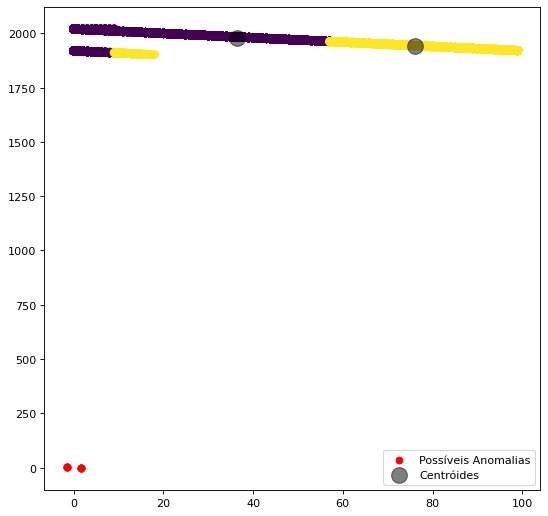

In [89]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(df_analises['ANOS_IDADE'], df_analises['ANO_NASC'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(values[:, 0], values[:, 1], color='r').set_label("Possíveis Anomalias")
# for i,txt in enumerate(outlierIndexesArray):
#     plt.annotate(txt, (values[i, 0], values[i, 1]),textcoords='offset points')
    
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5).set_label('Centróides')

    
plt.legend()
plt.show()

#### Clusterização 

In [7]:
df_2020.dtypes

IDADE                 float64
SEXO                   object
RACACOR                object
ESC2010                object
LOCOCOR                object
CODMUNOCOR              int64
ASSISTMED              object
CIRCOBITO              object
FONTE                  object
DIA_NASC                int64
MES_NASC              float64
ANO_NASC              float64
DIA_OBITO               int64
MES_OBITO               int64
ANO_OBITO               int64
ANOS_IDADE            float64
ESTADO                 object
GRUPO_CAUSA_BASICA     object
CAUSA_BASICA           object
OCUPACAO               object
GRUPO_OCUPACAO         object
dtype: object